# Simple MLP to calc logic function (xor)

In [93]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [94]:
tf.keras.__version__

'2.3.0-tf'

In [95]:
nw = tf.keras.Sequential()

In [96]:
nw.add(layers.Dense(4, activation='relu', input_shape=(2,)))
nw.add(layers.Dense(1, activation='sigmoid'))

In [97]:
nw.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [98]:
v = list()
for i in range(1000):
    v.append([0, 0, 0])
    v.append([0, 1, 1])
    v.append([1, 0, 1])
    v.append([1, 1, 0])

In [99]:
import pandas
import numpy

In [100]:
df = pandas.DataFrame(v, columns=['x1', 'x2', 'y'])

In [101]:
train = df[:3000]
val = df[3000:3500]
test = df[3500:]

In [102]:
history = nw.fit(train[['x1', 'x2']], train['y'], epochs=20, batch_size=4, validation_data=(val[['x1', 'x2']], val['y']))

Epoch 1/20
750/750 [==============================] - 1s 1ms/step - loss: 0.6113 - accuracy: 0.8840 - val_loss: 0.5444 - val_accuracy: 1.0000
Epoch 2/20
750/750 [==============================] - 1s 1ms/step - loss: 0.4733 - accuracy: 1.0000 - val_loss: 0.3994 - val_accuracy: 1.0000
Epoch 3/20
750/750 [==============================] - 1s 1ms/step - loss: 0.3292 - accuracy: 1.0000 - val_loss: 0.2627 - val_accuracy: 1.0000
Epoch 4/20
750/750 [==============================] - 1s 1ms/step - loss: 0.2077 - accuracy: 1.0000 - val_loss: 0.1583 - val_accuracy: 1.0000
Epoch 5/20
750/750 [==============================] - 1s 1ms/step - loss: 0.1207 - accuracy: 1.0000 - val_loss: 0.0882 - val_accuracy: 1.0000
Epoch 6/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0659 - accuracy: 1.0000 - val_loss: 0.0475 - val_accuracy: 1.0000
Epoch 7/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0352 - accuracy: 1.0000 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 

In [103]:
import matplotlib.pyplot as plt

In [104]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [105]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(acc_values) + 1)

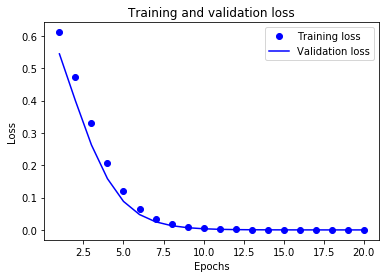

In [106]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

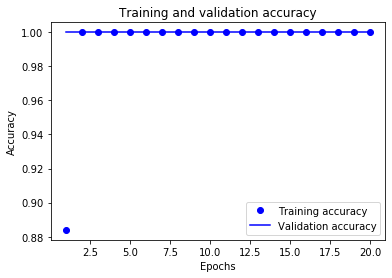

In [107]:
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [108]:
model = tf.keras.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(2,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [109]:
history = model.fit(train[['x1', 'x2']], train['y'], epochs=12, batch_size=4, validation_data=(val[['x1', 'x2']], val['y']))

Epoch 1/12
750/750 [==============================] - 1s 1ms/step - loss: 0.5637 - accuracy: 0.9170 - val_loss: 0.4763 - val_accuracy: 1.0000
Epoch 2/12
750/750 [==============================] - 1s 1ms/step - loss: 0.3945 - accuracy: 1.0000 - val_loss: 0.3163 - val_accuracy: 1.0000
Epoch 3/12
750/750 [==============================] - 1s 1ms/step - loss: 0.2513 - accuracy: 1.0000 - val_loss: 0.1929 - val_accuracy: 1.0000
Epoch 4/12
750/750 [==============================] - 1s 1ms/step - loss: 0.1476 - accuracy: 1.0000 - val_loss: 0.1090 - val_accuracy: 1.0000
Epoch 5/12
750/750 [==============================] - 1s 1ms/step - loss: 0.0811 - accuracy: 1.0000 - val_loss: 0.0580 - val_accuracy: 1.0000
Epoch 6/12
750/750 [==============================] - 1s 1ms/step - loss: 0.0429 - accuracy: 1.0000 - val_loss: 0.0307 - val_accuracy: 1.0000
Epoch 7/12
750/750 [==============================] - 1s 1ms/step - loss: 0.0225 - accuracy: 1.0000 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 

In [110]:
model.evaluate(test[['x1', 'x2']], test['y'])

16/16 [==============================] - 0s 998us/step - loss: 5.8267e-04 - accuracy: 1.0000


[0.0005826661363244057, 1.0]

In [111]:
pred_y = model.predict(test[['x1', 'x2']])

In [112]:
test['y'].subtract(numpy.round(pred_y, 0).reshape(1, 500)[0]).sum()

0.0

In [113]:
model.save('xor.h5', save_format='h5')
model.save('xor.tf', save_format='tf')

INFO:tensorflow:Assets written to: xor.tf\assets


In [114]:
df.to_csv('xor_df.csv', header=True, sep=',')

In [115]:
import onnx
import keras2onnx
import onnxruntime

from tensorflow.keras.models import load_model

In [116]:
model = load_model('xor.h5')

In [117]:
onnx_model = keras2onnx.convert_keras(model, model.name)

tf executing eager_mode: True
tf.keras model eager_mode: False
The ONNX operator number change on the optimization: 10 -> 6
The maximum opset needed by this model is only 9.


In [118]:
onnx.save_model(onnx_model, 'xor.onnx')

In [119]:
x = df[['x1', 'x2']].to_numpy().astype(numpy.float32)
y = df['y'].to_numpy().astype(numpy.float32)

In [120]:
x

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)

In [121]:
y

array([0., 1., 1., ..., 1., 1., 0.], dtype=float32)

In [122]:
numpy.savez('xor_x.npz', x)
numpy.savez('xor_y.npz', y)

In [123]:
content = onnx_model.SerializeToString()

In [124]:
sess = onnxruntime.InferenceSession(content)

In [125]:
input_name = sess.get_inputs()[0].name

In [126]:
pred_onnx = sess.run(None, {input_name: x})

In [128]:
numpy.round(pred_onnx, 0)

array([[[0.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [0.]]], dtype=float32)